In [1]:
import pandas as pd

# Pandas

## Example: Inspecting a dataset using pandas
Code received from Koenraad De Smedt (slightly simplified)

In [2]:
# data by Erik Bolstad containing geo locations of postal zone centers in Norway 
postnr_url = 'https://www.erikbolstad.no/postnummer-koordinatar/txt/postnummer.csv'

# read csv file from url into data frame 
# header is on line 0, which is first line 
postnr_frame = pd.read_csv(postnr_url, sep = '\t', encoding = 'utf-8', header = 0)
postnr_frame.columns

Index(['POSTNR', 'POSTSTAD', 'POSTNR- OG STAD', 'BRUKSOMRÅDE', 'FOLKETAL',
       'BYDEL', 'KOMMNR', 'KOMMUNE', 'FYLKE', 'LAT', 'LON', 'DATAKVALITET',
       'DATAKVALITETSFORKLARING', 'SIST OPPDATERT'],
      dtype='object')

Summarize the numerical fields:

In [3]:
postnr_frame.describe()

POSTNR      FOLKETAL       KOMMNR          LAT          LON  \
count  5786.000000   3099.000000  5786.000000  5786.000000  5786.000000   
mean   4810.551331   1584.646338  3175.292776    61.830553    10.287506   
std    2760.367439   1706.602682  1651.831175     3.350450     4.347519   
min       1.000000      0.000000   301.000000    57.997400    -8.718700   
25%    2460.250000    433.000000  1804.000000    59.726650     7.159105   
50%    4850.500000   1173.000000  3420.000000    60.362950    10.398800   
75%    7044.750000   2138.000000  4624.000000    63.170710    11.082558   
max    9991.000000  14794.000000  5444.000000    78.924500    84.000000   

       DATAKVALITET  
count   5746.000000  
mean       2.510442  
std        1.671648  
min        1.000000  
25%        1.000000  
50%        2.000000  
75%        2.000000  
max        6.000000

Create a scatter plot:

<AxesSubplot:xlabel='LON', ylabel='LAT'>

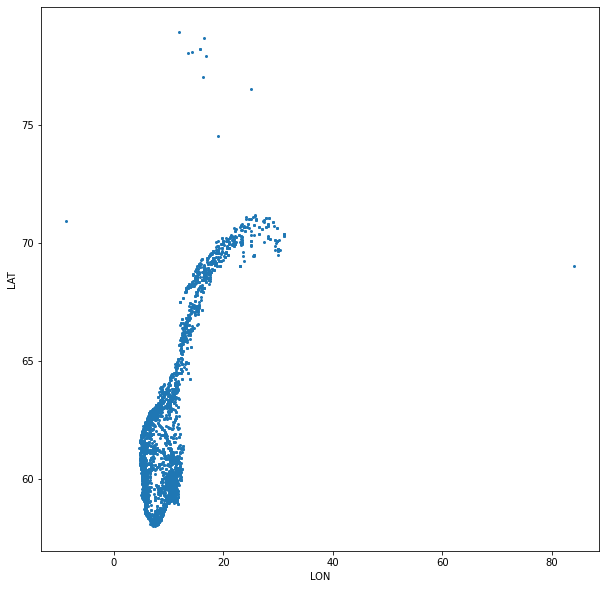

In [4]:
postnr_frame.plot.scatter(x = 'LON', y = 'LAT', s = 4, figsize = (10,10))

Filter out rows which are obvious errors and plot again:

<AxesSubplot:xlabel='LON', ylabel='LAT'>

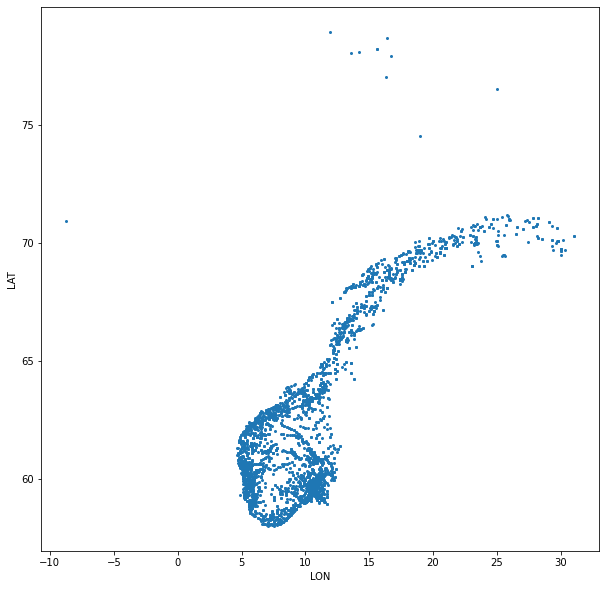

In [5]:
postnr_frame = postnr_frame[postnr_frame.LON < 31] 
postnr_frame.plot.scatter(x = 'LON', y = 'LAT', s = 4, figsize=(10,10))

Alternatively filter out all rows with uncertain locations:

<AxesSubplot:xlabel='LON', ylabel='LAT'>

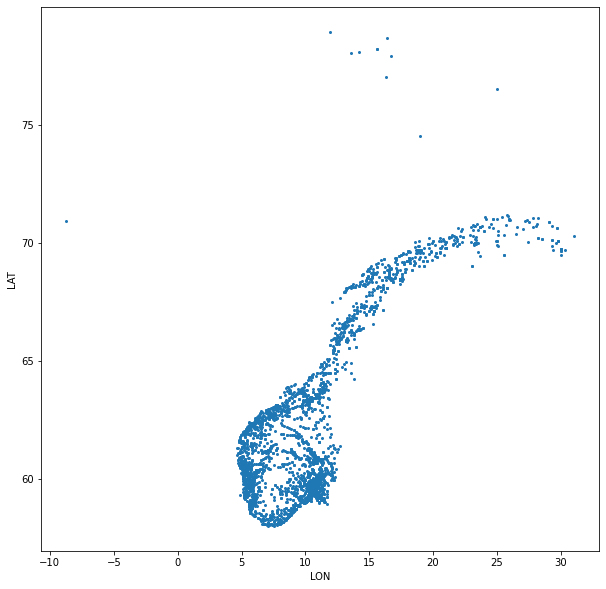

In [6]:
postnr_frame = postnr_frame[postnr_frame.DATAKVALITETSFORKLARING != 'Usikker plassering']
postnr_frame.plot.scatter(x = 'LON', y = 'LAT', s = 4, figsize=(10,10))

## Reading data

There are many ways of loading data into pandas. As you have seen, you
can pass another data structure as an argument when creating a DataFrame.
The pandas library also has functions that import data from your computer
or from the web. You pass the file path or the url as a string inside the parentheses:
* read_json()
* read_csv()
* read_excel()



### read_csv()
Important parameters (possible argument): 
* `sep`: What symbol separates columns in the csv file?
* `header`: 0 if the column names are on the first row, None if there is no header.

All possible arguments in the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


In [7]:
data = pd.read_csv("https://www.nb.no/sbfil/leksikalske_databaser/hyphendata.csv", 
                   header = None, # The column names are missing in the data
                   names = ["frequency", "word", "first_part", "second_part"])

In [8]:
data

frequency               word first_part second_part
0            19451              under         un         der
1            19368           saaledes        saa       ledes
2            19050             derfor        der         for
3            18165             kommer        kom         mer
4            18162         imidlertid       imid      lertid
...            ...                ...        ...         ...
1773191          2      Ddeleggelser,        Dde  leggelser,
1773192          2  Foreningsfrihet»,  Forenings    frihet»,
1773193          2         ?Discours"      ?Disc       ours"
1773194          2     ?Oprindelsen".       ?Opr  indelsen".
1773195          2       ?Snøfuglar".      ?Snøf     uglar".

[1773196 rows x 4 columns]

### read_json()

All possible arguments in the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

In [9]:
countries = pd.read_json("https://restcountries.eu/rest/v2/")
type(countries)

pandas.core.frame.DataFrame

## Inspecting data

Countries is now a DataFrame object. The DataFrame object contains a variable columns you can access to inspect the column names:

In [10]:
countries.columns

Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders',
       'nativeName', 'numericCode', 'currencies', 'languages', 'translations',
       'flag', 'regionalBlocs', 'cioc'],
      dtype='object')

If we dont need all the columns, we can create a new DataFrame with the ones we need:

In [11]:
countries = countries[["name", "region", "subregion", "population", "area", "latlng"]]

In [12]:
countries = countries.sort_values(by = "population", ascending = False)
countries.head(10)

name    region           subregion  population  \
48                      China      Asia        Eastern Asia  1377422166   
104                     India      Asia       Southern Asia  1295210000   
239  United States of America  Americas    Northern America   323947000   
105                 Indonesia      Asia  South-Eastern Asia   258705000   
31                     Brazil  Americas       South America   206135893   
169                  Pakistan      Asia       Southern Asia   194125062   
162                   Nigeria    Africa      Western Africa   186988000   
18                 Bangladesh      Asia       Southern Asia   161006790   
185        Russian Federation    Europe      Eastern Europe   146599183   
114                     Japan      Asia        Eastern Asia   126960000   

           area          latlng  
48    9640011.0   [35.0, 105.0]  
104   3287590.0    [20.0, 77.0]  
239   9629091.0   [38.0, -97.0]  
105   1904569.0   [-5.0, 120.0]  
31    8515767.0  [-10.0, -55.0]  
169    881912.0    [30.0, 70.0]  
162    923768.0     [10.0, 8.0]  
18     147570.0    [24.0, 90.0]  
185  17124442.0   [60.0, 100.0]  
114    377930.0   [36.0, 138.0]

## Write to and read from excel file
- `DataFrame.to_excel()`
- `read_excel()`

All parameters: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html


In [13]:
countries.to_excel("data/countries.xlsx", index = False)

In [14]:
pd.read_excel("data/countries.xlsx")

name    region  \
0                                           China      Asia   
1                                           India      Asia   
2                        United States of America  Americas   
3                                       Indonesia      Asia   
4                                          Brazil  Americas   
..                                            ...       ...   
245                   French Southern Territories    Africa   
246                                      Pitcairn   Oceania   
247  South Georgia and the South Sandwich Islands  Americas   
248                                 Bouvet Island       NaN   
249             Heard Island and McDonald Islands       NaN   

              subregion  population       area                  latlng  
0          Eastern Asia  1377422166  9640011.0           [35.0, 105.0]  
1         Southern Asia  1295210000  3287590.0            [20.0, 77.0]  
2      Northern America   323947000  9629091.0           [38.0, -97.0]  
3    South-Eastern Asia   258705000  1904569.0           [-5.0, 120.0]  
4         South America   206135893  8515767.0          [-10.0, -55.0]  
..                  ...         ...        ...                     ...  
245     Southern Africa         140     7747.0        [-49.25, 69.167]  
246           Polynesia          56       47.0  [-25.06666666, -130.1]  
247       South America          30        NaN          [-54.5, -37.0]  
248                 NaN           0       49.0     [-54.43333333, 3.4]  
249                 NaN           0      412.0    [-53.1, 72.51666666]  

[250 rows x 6 columns]

## Series

The columns in a DataFrame are Series objects. Series objects have a method `value_counts()` that gives you the most frequent values in the column:

In [15]:
countries["region"].value_counts()

Africa      60
Americas    57
Europe      53
Asia        50
Oceania     27
             2
Polar        1
Name: region, dtype: int64

You can concatenate them and assign the result to a new column:

In [16]:
countries["useless_column"] = countries["region"] + countries["region"]
countries.head(3)

name    region         subregion  population  \
48                      China      Asia      Eastern Asia  1377422166   
104                     India      Asia     Southern Asia  1295210000   
239  United States of America  Americas  Northern America   323947000   

          area         latlng    useless_column  
48   9640011.0  [35.0, 105.0]          AsiaAsia  
104  3287590.0   [20.0, 77.0]          AsiaAsia  
239  9629091.0  [38.0, -97.0]  AmericasAmericas

Or calculate a new numerical column:

In [17]:
countries["population_density"] = countries["population"] / countries["area"]
countries.sort_values(by = "population_density", ascending = False).head(5)

name  region           subregion  population     area  \
131      Macao    Asia        Eastern Asia      649100    30.00   
147     Monaco  Europe      Western Europe       38400     2.02   
202  Singapore    Asia  South-Eastern Asia     5535000   710.00   
101  Hong Kong    Asia        Eastern Asia     7324300  1104.00   
86   Gibraltar  Europe     Southern Europe       33140     6.00   

                    latlng useless_column  population_density  
131  [22.16666666, 113.55]       AsiaAsia        21636.666667  
147     [43.73333333, 7.4]   EuropeEurope        19009.900990  
202    [1.36666666, 103.8]       AsiaAsia         7795.774648  
101  [22.25, 114.16666666]       AsiaAsia         6634.329710  
86    [36.13333333, -5.35]   EuropeEurope         5523.333333

## Filtering data

If we use logical operators on a series, we get a new series we in turn can use to filter a dataframe

In [18]:
asia_series = countries["region"] == "Asia"
asia_series

48      True
104     True
239    False
105     True
31     False
       ...  
80     False
177    False
209    False
30     False
98     False
Name: region, Length: 250, dtype: bool

In [19]:
asian_countries = countries[asia_series]
asian_countries.head(5)

name region           subregion  population       area  \
48        China   Asia        Eastern Asia  1377422166  9640011.0   
104       India   Asia       Southern Asia  1295210000  3287590.0   
105   Indonesia   Asia  South-Eastern Asia   258705000  1904569.0   
169    Pakistan   Asia       Southern Asia   194125062   881912.0   
18   Bangladesh   Asia       Southern Asia   161006790   147570.0   

            latlng useless_column  population_density  
48   [35.0, 105.0]       AsiaAsia          142.885954  
104   [20.0, 77.0]       AsiaAsia          393.969443  
105  [-5.0, 120.0]       AsiaAsia          135.833882  
169   [30.0, 70.0]       AsiaAsia          220.118404  
18    [24.0, 90.0]       AsiaAsia         1091.053669

We can create a similar filter using a regular expressions:

In [20]:
countries[countries["name"].str.match(".*rr.*")]

name    region         subregion  population  \
201                    Sierra Leone    Africa    Western Africa     7075641   
5                           Andorra    Europe   Southern Europe       78014   
192       Saint Pierre and Miquelon  Americas  Northern America        6069   
150                      Montserrat  Americas         Caribbean        4922   
32   British Indian Ocean Territory    Africa    Eastern Africa        3000   
80      French Southern Territories    Africa   Southern Africa         140   

        area                       latlng    useless_column  \
201  71740.0                 [8.5, -11.5]      AfricaAfrica   
5      468.0                  [42.5, 1.5]      EuropeEurope   
192    242.0  [46.83333333, -56.33333333]  AmericasAmericas   
150    102.0               [16.75, -62.2]  AmericasAmericas   
32      60.0                 [-6.0, 71.5]      AfricaAfrica   
80    7747.0             [-49.25, 69.167]      AfricaAfrica   

     population_density  
201           98.628952  
5            166.696581  
192           25.078512  
150           48.254902  
32            50.000000  
80             0.018072

And combine filters:

In [21]:
countries[(countries["population"] > 5000000) & (countries["population"] < 6000000)]

name  region           subregion  population      area  \
124    Lebanon    Asia        Western Asia     5988000   10452.0   
62     Denmark  Europe     Northern Europe     5717014   43094.0   
202  Singapore    Asia  South-Eastern Asia     5535000     710.0   
76     Finland  Europe     Northern Europe     5491817  338424.0   
204   Slovakia  Europe      Eastern Europe     5426252   49037.0   
70     Eritrea  Africa      Eastern Africa     5352000  117600.0   
167     Norway  Europe     Northern Europe     5223256  323802.0   

                         latlng useless_column  population_density  
124  [33.83333333, 35.83333333]       AsiaAsia          572.904707  
62                 [56.0, 10.0]   EuropeEurope          132.663805  
202         [1.36666666, 103.8]       AsiaAsia         7795.774648  
76                 [64.0, 26.0]   EuropeEurope           16.227623  
204         [48.66666666, 19.5]   EuropeEurope          110.656280  
70                 [15.0, 39.0]   AfricaAfrica           45.510204  
167                [62.0, 10.0]   EuropeEurope           16.131018

In [22]:
countries[(countries["subregion"] == "Southern Asia") | (countries["subregion"] == "Northern Europe")].head(5)

name  region  \
104                                              India    Asia   
169                                           Pakistan    Asia   
18                                          Bangladesh    Asia   
107                         Iran (Islamic Republic of)    Asia   
238  United Kingdom of Great Britain and Northern I...  Europe   

           subregion  population       area        latlng useless_column  \
104    Southern Asia  1295210000  3287590.0  [20.0, 77.0]       AsiaAsia   
169    Southern Asia   194125062   881912.0  [30.0, 70.0]       AsiaAsia   
18     Southern Asia   161006790   147570.0  [24.0, 90.0]       AsiaAsia   
107    Southern Asia    79369900  1648195.0  [32.0, 53.0]       AsiaAsia   
238  Northern Europe    65110000   242900.0  [54.0, -2.0]   EuropeEurope   

     population_density  
104          393.969443  
169          220.118404  
18          1091.053669  
107           48.155649  
238          268.052697

Why `&` and `|`?
These operators correspond to `and` and `or` respectively, but can be applied to the underlying data structures in pandas. This is part of what makes pandas so efficient on large datasets.

## Grouping data

In [23]:
continents = countries.groupby("region").sum()
continents

population         area  population_density
region                                               
                   0       461.00            0.000000
Africa    1185705747  30323491.00         5024.189472
Americas   990317681  42248044.36        10193.727230
Asia      4386254784  32064971.00        46983.012007
Europe     746688182  23138282.46        34157.200829
Oceania     40169837   8515313.00         3082.516536
Polar           1000  14000000.00            0.000071

## Plotting data

<AxesSubplot:xlabel='region'>

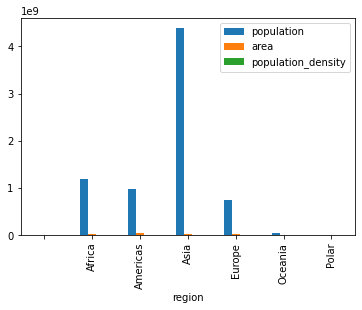

In [24]:
continents.plot.bar()

<AxesSubplot:ylabel='population'>

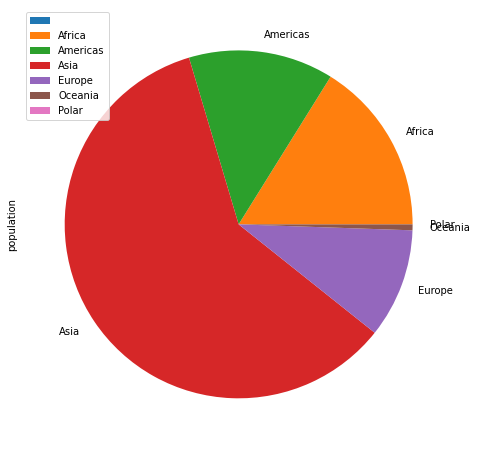

In [25]:
continents.plot.pie(y = "population", figsize = (8, 8))

## Exercise 2


Load data from an API, csv file or excel file of your choice. Filter it and plot it.<br>
Challenge: create scatter plot from countries api by separating the x and y values in "latlng".

In [ ]:
# your code here